# Project 1: First steps in Machine Learning (60+30 Points)
This project is split up into two parts. In the first, you will train and evaluate your first machine learning models. For this part, we provide a structure with a lot of todos guiding you through the work. In the second part, you can choose one of two topics which are a little more advanced and require more own thinking and programming. Here you will work on your own. Of course, the first part gives you an orientation for structuring your work. Please read the following information carefully.

## Grading
You can gain 60 points in the part 1 and 30 in part 2 (note that performing both elective options does not mean that you can get more than 30 points). Besides, each of you can individually gain up to 10 points for creating a good peer-review.

Please follow the **TODO**s for part 1 in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the TODOs. Note, that analyzing the theoratical parts of the project give roughly 2/3 of all points (at least in part 1)
* when describing classifiers explain at least the training, testing, and the hyper-parameters
* always train and evaluate your models using cross validation
* have a look at all imports in this notebook; they already define which method you should use


## Organizational and Deadline
As we are doing an anonymized peer review, please do not include information like your name, your student id, your grop number or information about your tutorial in here.

On Monday, **November 15th**, there will be a Q&A session in the tutorials! Start to work on this project **from now on** and take the offer to resolve any remaining ambiguity.
This assignment is due on **November 23rd**. Please upload your solution to the Lernraum+ as an ipynb-file.<br>
For a submission you need to be part of a assignment group.

# 1st (mandatory) Part
## kNN - Classifier

In [ ]:
#definded functions and packages we will use throughout this project 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm
from utils import plot_2d_decisionboundary
from utils import plot_classification_dataset


#function to take a closer look at the data
def explore_data(data_set,X,y):
    print('size:',[X.size,y.size])
    print('dimensionen:',[X.ndim,y.ndim])
    print('shape:',[X.shape,y.shape])
    print('type:',[X.dtype,y.dtype])
    print()
    Xf1 = X[0:, 0]
    Xf2 = X[0:, 1]
    print("Maximum of Feature 1:   " + str(np.amax(Xf1)))
    print("Minimum of Feature 1:   " + str(np.amin(Xf1)))
    print("Average of Feature 1:   " + str(np.average(Xf1)))
    print("Deviation of Feature 1: " + str(np.std(Xf1)))
    print()
    print("Maximum of Feature 2:   " + str(np.amax(Xf2)))
    print("Minimum of Feature 2:   " + str(np.amin(Xf2)))
    print("Average of Feature 2:   " + str(np.average(Xf2)))
    print("Deviation of Feature 2: " + str(np.std(Xf2)))
    print()
    unique, counts = np.unique(y, return_counts=True)
    print("Set of labels: " +str(unique))
    print("Number of elements with label 0: " + str(counts[0]))
    print("Number of elements with label 1: " + str(counts[1]))
    
    
    #plot the data set
    plt.plot(X,y,'bo')
    plt.title('X ~ y')
    plt.show()
    
    scatter_plot(X,y)
    plt.title('Scatterplot of X (X_1 ~ X_2) colored by the class y')
    plt.show()
    
#scatterplot where the dots are coloured after their class/categorie
def scatter_plot(X,y):
    x_0 = [x[0] for x in X]
    x_1 = [x[1] for x in X]
    plt.scatter(x_0, x_1,c=y,cmap=cm.jet)
    plt.colorbar()
    return plt
    

In [6]:
# load dataset_1.npz
# the data and labels are saved in X and y, respectively
data_set_1 = np.load('dataset_1.npz')
X_1 = data_set_1['X']
y_1 = data_set_1['y']

### The first dataset

size: [1600, 800]
dimensionen: [2, 1]
shape: [(800, 2), (800,)]
type: [dtype('float64'), dtype('int64')]

Maximum of Feature 1:   2.8448246783194406
Minimum of Feature 1:   -1.3936380815334992
Average of Feature 1:   0.21181324139664512
Deviation of Feature 1: 0.8831455944022223

Maximum of Feature 2:   1.4397948053382816
Minimum of Feature 2:   -1.1206666486856673
Average of Feature 2:   0.2276847969292357
Deviation of Feature 2: 0.5638299963867028

Set of labels: [0 1]
Number of elements with label 0: 400
Number of elements with label 1: 400


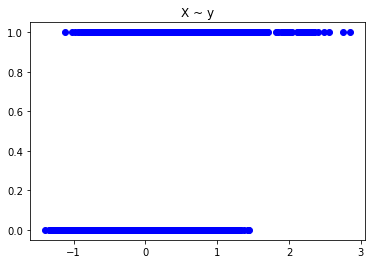

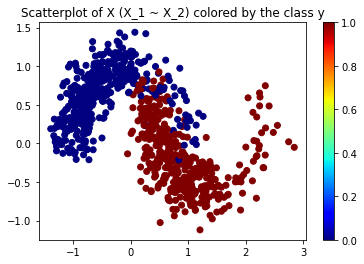

In [7]:
# TODO: take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.
explore_data(data_set_1,X_1,y_1)

**TODO:** Describe the data

The data set consists of 800 samples and has two dimensions. Feature 1 has a minimum of approximately -1.39 and a maximum of approximately 2.84. Among all samples, its average lies at approximately 0.21 with a standart deviation of approximately 0.88. Feature 2 has a minimum of approximately -1.12 and a maximum of approximately 1.43. Its average lies at approximately 0.22 with standart deviation of approximately 0.56. Labels assigned to all samples are either 0 or 1, which are evenly distributed with each having 400 data points.


### Evaluation Method: Cross Validation

**TODO:** Explain how cross validation works and why it is used for training and evaluating machine learning models.


Cross Validation allows us to compare different machine learning methods and a get sense of how well they work for our data. We use cross validation during the training and testing steps of machine learning.

If we have one data set for training and for testing our different ML models, we cannot use the whole dataset to first train and then test the models. Rather we will put our data in an arbitrary amount of blocks and use one block for testing and the rest for training. But how should we define which block should be used for testing.

Cross Validation will use all differents combinations for the training and testing blocks and summarize the result at the ende. So we do not only compare different ML models but different ML Models which were trained and tested with different data blocks to find out, which one models our data the best.

The method to divide the data into 4 blocks is called **Four-fold cross validation**, however the number of blocks is arbitrary and one extreme way is the **Leave on out cross validation**, where -as the name depicits- one data point is used for testing and the rest is used for training

In practice it's very common to use to divide the data into 10 blocks, the so called **ten - fold cross validation**

In case of tuning parameters or hyperparameters, where we sort of guess the value, we can actually use the cross validation to find the best value for this tuning parameter. For example in the KNN Classifier, we can use the cross validation to find the best k value.

### the Model

**TODO:** Describe the kNN classifier

The kNN classifier is a non parametric model for supervised and unsupervised learning, for which the data normally has a feature that gives us the class eg. categorie of our data. Then we have a supervised learning problem. If we do not have a class, we could use clustering methods to find them, which would then rather be an unsupervised learning problem.

For the kNN classifier the training consists of storing the data.
We are given a data set D with known categories, the k-nearest neighbour classifier for k>0 returns the category that maximizes the counter, which k nearest neighbours have the category.

In other words, for the k nearest neighbour classifier (kNN) we are given a data set for which we know the categories. For a new data point $x_0$, we check the k closest neighbours to $x_0$ and look which category appears the most and our new data point then belongs to this category.


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #package for cross validation

#define a function to train and test the knn classifier with cross validation
#variable k: for KNN
#cv_fold : for the cross validation, whether its 10 fold,4 fold and so on
#X and y: data set 
def knn_with_cv(k,cv_fold,X,y,print_solution):
    #create a new KNN Model with n_neighbors=k
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    
    #train model with a cross validaiton of 10 (data is split into 10 blocks)
    cv_scores = cross_val_score(knn_cv,X,y,cv=cv_fold)
    if print_solution == True:
        #print each cv score (accuracy) and average them
        print('KNN Model with k = {} and a {} - fold cross validation:'.format(k,cv_fold))
        print(cv_scores)
        print('cv_scores mean:{} \n'.format(np.mean(cv_scores)))
    else:
        return np.mean(cv_scores)

In [9]:
# TODO: train and evaluate a kNN classifier with k=5 using cross-validation for training and testing, 
#       and report the accuracy of the model

knn = knn_with_cv(5,10,X_1,y_1,True)



KNN Model with k = 5 and a 10 - fold cross validation:
[0.9375 1.     0.95   0.9875 0.9375 0.9375 0.975  0.975  0.9625 0.9   ]
cv_scores mean:0.95625 



**TODO:** Report your results.

With k = 5 and a ten-fold cross validation, in average our model predicted 95% of our testing data correctly. In one case it even predicted 100% correctly. Therefore we can say, that for k=5 our knn Model models our data very well.


In [10]:
# TODO: train and test the kNN classifier for different values of k on dataset 1.
#       Plot the accuracy for different values of k. Choose all possible values for k.
#       
# HINT: Here, you can use a fixed spit
from sklearn.model_selection import train_test_split

#split data
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2,random_state=42)
#create an array of k values with all possible value -> 1 to 640
k_array = range(1,640)

#train and test data, calculate accuracy
scores = []
for k in k_array:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_test, y_test))

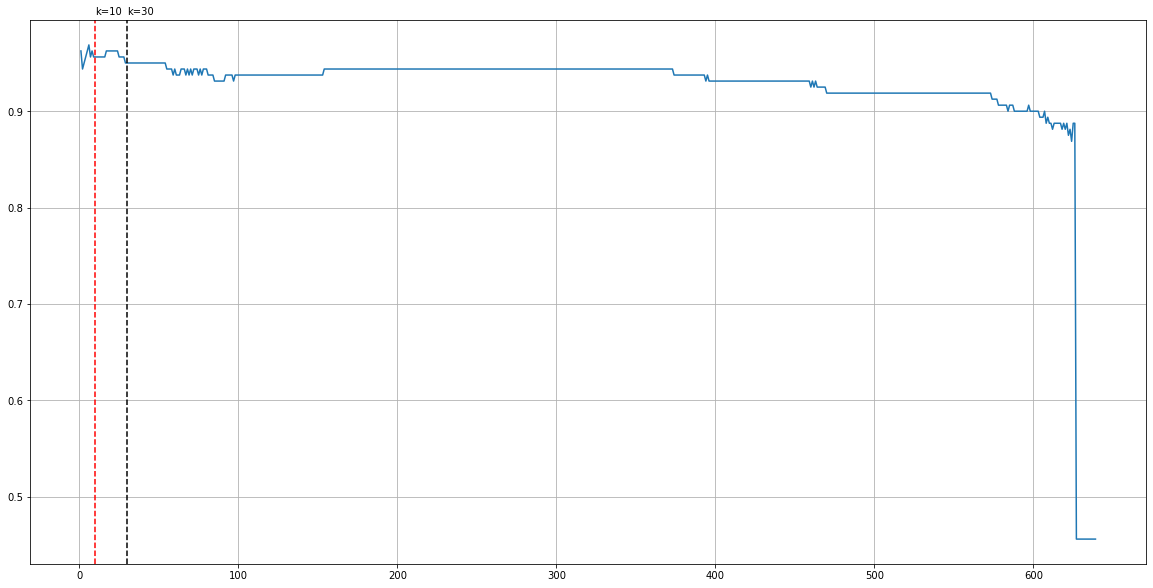

Best score is 0.96875 for k = [6]


In [111]:
plt.figure(figsize=(20,10))
plt.plot(k_array, scores)
plt.axvline(x=30,color='black', linestyle='--',label='30')
plt.text(30,1, 'k=30')
plt.axvline(x=10,color='red', linestyle='--',label='30')
plt.text(10,1, 'k=10')
plt.grid(True)
plt.show()

maxscore = np.max(scores)

indices = [i for i, x in enumerate(scores) if x == maxscore]

maxks = [x+1 for x in indices]
print("Best score is " + str(maxscore) + " for k = " + str(maxks))

In [11]:
#find the best K with GridsearchCV 
from sklearn.model_selection import GridSearchCV
neighbours_range_1 = range(2,31)
neighbours_range_2 = range(2,11)

def find_best_k(neigh_range):
    params = {'n_neighbors':neigh_range}
    knn = KNeighborsClassifier()
    model = GridSearchCV(knn, params, cv=5,scoring='accuracy')
    model.fit(X_1,y_1)
    print('For {} the best k is {}'.format(neigh_range,model.best_params_))
    
find_best_k(neighbours_range_1)
find_best_k(neighbours_range_2)

For range(2, 31) the best k is {'n_neighbors': 24}
For range(2, 11) the best k is {'n_neighbors': 6}


**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?

In this task we also used the cross validation to find out the accuracy for different k - values. As we are using a 5 - fold cross validation, 80% of our data is used for training. Therefore from 800 data points 640 are used for training. The smallest possible value for k is 1 and the largest is 640, to check all data points which are currently stored in the model.

For k= 1 we only compare our data point to the closest one. We still get a very good accuracy here, but only because our categories are clearly seperated at most times. If we had overlapping categories, new points in this area would be assigned to the correct category only by chance. A greater value for k would be more advisable, to get more context out of the data. For k = 640 we check all data points. If we have more data points of class 0, every new data point will get assigned to that class and the other way around. Therefore we can see here, that roughly 75% of our testing data gets assigned correctly and the rest not.

* For which values of k does the model perform best?

In the graph above, we can see that we get a good accuracy for k values up to 30. But the accuracy for k<=10 is as good as k between 10 and 30. Therefore we would say, to save time and costs, that we get a good accuracy for k around 10.

We also rechecked our result with the GridSearchCV, which we can use to find the best value for our hyperparameter k with Cross Validation for different ranges of possible k values. For the range 2 - 30 we get that k=24 performs best. ,For the range 2 - 10 we get that k=6 performs best. As we know, that the decision boundary becomes smoother for larger k, we would choose **k = 24**. 

* Would this value perform best on another dataset as well?

As data sets can differ greatly, its very unlikely that this k - value performs the best for another data set as well. Of course it can happen, but this would rather be by chance and not as a rule. 

* How can k be choosen?

There is no pre-defined statistical method to find the best value for k. What we did here is one possibility to find k. We plot the accuracy or error rate against different k values and then choose one, that performs best. We can also directly use a function like GridSearchCV but it could happen, that - depending on the k values we choose- we get a k value which doesn't actually perform as good as we thought. Another possibilty is to take the square root of our sample size. In our case it would be the square root of our testing size (640) which is around 25,28.


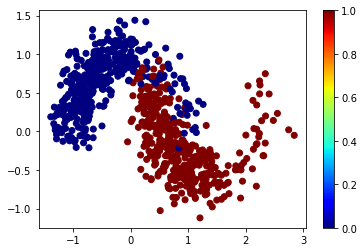

In [267]:
scatter_plot(X_1,y_1)


## Logistic Regression
Let's try another model as well.

### the Dataset

size: [2000, 1000]
dimensionen: [2, 1]
shape: [(1000, 2), (1000,)]
type: [dtype('float64'), dtype('int64')]

Maximum of Feature 1:   10.352313894962517
Minimum of Feature 1:   -9.915018776079421
Average of Feature 1:   0.007413666948272919
Deviation of Feature 1: 6.013139474266857

Maximum of Feature 2:   10.23792956340208
Minimum of Feature 2:   -9.890090608954633
Average of Feature 2:   0.5183357738818299
Deviation of Feature 2: 5.967888004425045

Set of labels: [0 1]
Number of elements with label 0: 530
Number of elements with label 1: 470


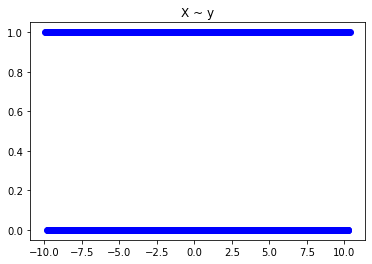

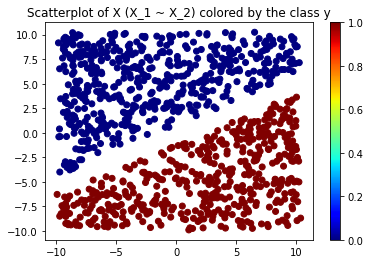

In [12]:
# TODO: load dataset_2.npz and analyze the dataset (data is stored again in X and in y)
data_set_2 = np.load('dataset_2.npz')
X_2 = data_set_2['X']
y_2 = data_set_2['y']

explore_data(data_set_2,X_2,y_2)


**TODO:** Describe the data

The data set consists of 536 samples and has two dimensions. Feature 1 has a minimum of approximately -9.91 and a maximum of approximately 10.35. Among all samples, its average lies at approximately 0.007 with a standart deviation of approximately 6.01. Feature 2 has a minimum of approximately 10.23 and a maximum of approximately -9.89. Its average lies at approximately 0.51 with standart deviation of approximately 5.96. Labels assigned to all samples are either 0 or 1. Class 0 occures 530 times and class 1 470 times. The classes are almost balanced.



### the Model

**TODO:** Describe the logistic regression model

The logistic Regression predicts given a data set the probability of an event in {0,1} taking place or not. It deals with classifications problems with classes {0,1} and works similar to linear regressions, but it doesn't fit a line to the data. It can also be extended to more than two classes.

Our data:
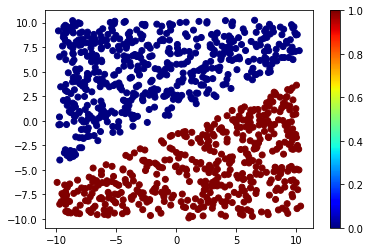

We can clearly see that our data has two distinct classes, 1 and 0. Now we are trying to find a decision boundary, a line that devides these two classes and tells us to which class a new data point will belong depending whether the point is below or above the decision boundary.

We have the constraints, that for all values for X, our y can only have the values 0 or 1. Therefore we are going to use a logistic/sigmoid function $$sgd(t) = \frac{1}{1+e^{-t}}$$ with $t = f_\vec{w}(\vec{x})=\vec{w}^T\vec{x},  \vec{w}=(\Theta,w_1,w_2)^T,\vec{x}=(1,x_1,x_2)^T$

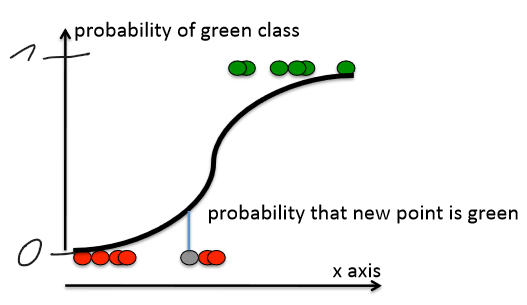

$t = f_\vec{w}(\vec{x})=\vec{w}^T\vec{x}$ is our decision boundary and we need to find the best values for our coefficients in $\vec{w}$. We will use the Maximum likelihood estimator or negative log likelihood (NLL). It's determined by the gradient descent, e.g. we use a numerical and not analytical solution. The concept of the gradient descent is, that we will use the gradient(vector of derivatives) of a function depending on our vector $\vec{w}$, to find the direction with the steepest descend and go there with a step size of $\eta > 0$. Then we will repeat these steps until we cannot descend anymore. The function, we are trying to minimize, is the cost function NLL given by **slide 57**

Logistic Regression and a 5 - fold cross validation:
[1. 1. 1. 1. 1.]
cv_scores mean:1.0 

The coefficients are:  [[ 1.37892579 -2.6760758 ]]
The intercept is:  [-0.51526438]


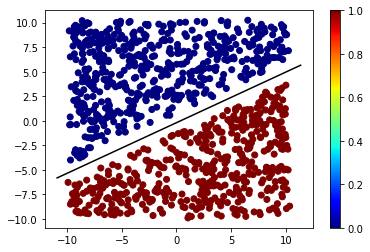

In [13]:
# TODO: * Train and test logistic regression on dataset_2.npz (cross validation),
#       * Plot the dataset and the decision boundary, own implementation needed (see lecture slide 52 in slides1.pdf)
#         where the decision boundary is optimized on the complete dataset (X).

from sklearn.linear_model import LogisticRegression

#define a function to train and test the logistic regression with cross validation
#cv_fold : for the cross validation, whether its 10 fold,4 fold and so on
#X and y: data set in this task
def logReg_with_cv(cv_fold,X,y,print_solution):
    #create a new logistic regression 
    logReg = LogisticRegression()
    #train model with a cross validaiton of cv_fold (data is split into cv_fold blocks)
    cv_scores = cross_val_score(logReg,X,y,scoring='accuracy', cv=cv_fold, n_jobs=-1)

    if print_solution == True:
        #print each cv score (accuracy) and average them
        print('Logistic Regression and a {} - fold cross validation:'.format(cv_fold))
        print(cv_scores)
        print('cv_scores mean:{} \n'.format(np.mean(cv_scores)))
    else:
        return np.mean(cv_scores)
        
#train and test data_set_2 with logitsic regression and cross validation
logReg_with_cv(5,X_2,y_2,True)

#define a function to train the logistic regression on the whole data set (no testing!)
#X and y: data set in this task
def logReg(X,y,print_solution):
    #create a new logistic regression 
    logReg =  LogisticRegression().fit(X,y)
    if print_solution == True:
        #print coefficients of the logitsic regression
        print('The coefficients are: ',logReg.coef_)
        print('The intercept is: ',logReg.intercept_)
    return logReg
#train model
clf = logReg(X_2,y_2,True)

#todo:plot the decision line like below 
#define the decision boundary 
def decBou(coef,interc,x):
    w_1 = coef[0][0]
    w_2 = coef[0][1]
    intercept = interc[0]
    return -(w_1/w_2)*x-(intercept/w_2)

x_min, x_max = X_2[:, 0].min() - 1, X_2[:, 0].max() + 1
#corresponding values to x_min and x_max
y_min, y_max = decBou(clf.coef_,clf.intercept_,x_min), decBou(clf.coef_,clf.intercept_,x_max) 

scatter_plot(X_2,y_2)
plt.plot([x_min,x_max],[y_min,y_max],'black')
plt.show()



**TODO:** Report your results.

For the Logistic Regression we get a 100% accuracy with the cross validation. If we look at our data set, this makes sense as our points are clearly sperated. Even if we only use a part of the data set, the decision boundary will still give us the correct predictions for the testing data.



In [20]:
# TODO: Check whether w separates the two classes.
#       How does the negative log-likelihood (NLL) change for αw as α goes to infinity?
#
# Hint: Implement an own function which computes the NLL for a new w, and report the NLL for different values.

#define the NLL function (slide 57)
#w: vector of our coefficient and intercept
#x: data
#y:data -> classes
def nll(w,theta,x,y):
    n = len(y)
    nll = 0   
    for i in range(0,n):
        inner_log = 1/(1+np.exp(-(np.sum(np.transpose(w)*x[i])+theta)))
        #we can be relatively sure, that the variable inner_log will never be 0
        #but it can become 1 if the exponential value would become so small that python would "see" it as 0
        #in y_i_eq_0 we would then try to get the logarithmus of 0 which will produce a null exeption
        #therefore we will subtract a very small number from the inner log if its equal to 1
        if inner_log == 1:
            inner_log= inner_log - np.finfo(float).eps
        y_i_eq_1 = y[i]*np.log(inner_log)
        y_i_eq_0 = (1-y[i])*np.log(1-inner_log)
    
        nll = nll+y_i_eq_1+y_i_eq_0
        i=i+1 
        
    #nll = nll*(-1) # have the Negative log likelihood
    print('NLL is {} for coefficients {} and interceptor {}'.format(nll,w,theta))


nll(clf.coef_,clf.intercept_,X_2,y_2)#fitted model above

#create different coeffcients in the form a*w with a going towards infinity and then calculate the NLL
#array with different a value
a_array = [2,5,10,20,50,100]
for a in a_array:
    coef = a*clf.coef_
    intercept = a*clf.intercept_
    print('{}: '.format(a))
    nll(coef,intercept,X_2,y_2)


NLL is [-2536.7720676] for coefficients [[ 1.37892579 -2.6760758 ]] and interceptor [-0.51526438]
2: 
NLL is [-4978.01204199] for coefficients [[ 2.75785158 -5.35215159]] and interceptor [-1.03052876]
5: 
NLL is [-11270.57215533] for coefficients [[  6.89462895 -13.38037898]] and interceptor [-2.5763219]
10: 
NLL is [-19389.49888864] for coefficients [[ 13.7892579  -26.76075797]] and interceptor [-5.1526438]
20: 
NLL is [-34225.46758131] for coefficients [[ 27.5785158  -53.52151594]] and interceptor [-10.30528759]
50: 
NLL is [nan] for coefficients [[  68.94628951 -133.80378985]] and interceptor [-25.76321898]
100: 
NLL is [nan] for coefficients [[ 137.89257901 -267.6075797 ]] and interceptor [-51.52643796]


<ipython-input-20-747d9165eb8d>:14: RuntimeWarning: overflow encountered in exp
  inner_log = 1/(1+np.exp(-(np.sum(np.transpose(w)*x[i])+theta)))
<ipython-input-20-747d9165eb8d>:21: RuntimeWarning: divide by zero encountered in log
  y_i_eq_1 = y[i]*np.log(inner_log)
<ipython-input-20-747d9165eb8d>:21: RuntimeWarning: invalid value encountered in multiply
  y_i_eq_1 = y[i]*np.log(inner_log)


**TODO:** What can you infer from your observations regarding the training of a model?

The larger $\vec{w}$ becomes, the smaller the NLL and the more difficult it gets to compute the NLL as we run ito more and more errors as seen above. Therefore $\vec{w}$ should always be normalized and have the length 1. As the vector $a\vec{w}$, with $a$ going toward infinity, shows into the same direction as the vector $\vec{w}$.




## Comparing kNN and Logistic Regression
We want you to compare the kNN and the logistic regression classifier.

Data Set 1
KNN Model with k = 24 and a 5 - fold cross validation:
[0.98125 0.975   0.9625  0.96875 0.91875]
cv_scores mean:0.9612499999999999 

Logistic Regression and a 10 - fold cross validation:  0.9325


C:\Users\nely9\OneDrive\Universität\WS2122\Introduction Machine Learning\Project\Project_1\Project 1-20211103\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


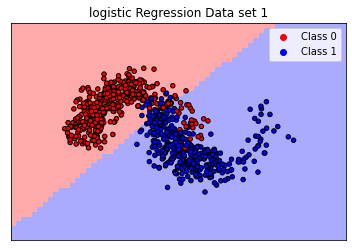

C:\Users\nely9\OneDrive\Universität\WS2122\Introduction Machine Learning\Project\Project_1\Project 1-20211103\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


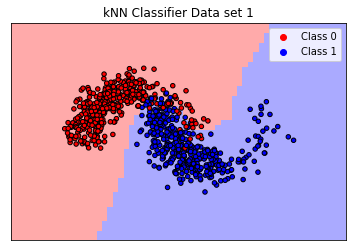

Data Set 2
KNN Model with k = 28 and a 5 - fold cross validation:
[1. 1. 1. 1. 1.]
cv_scores mean:1.0 

Logistic Regression and a 10 - fold cross validation:  1.0


C:\Users\nely9\OneDrive\Universität\WS2122\Introduction Machine Learning\Project\Project_1\Project 1-20211103\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


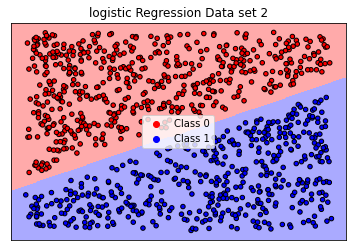

C:\Users\nely9\OneDrive\Universität\WS2122\Introduction Machine Learning\Project\Project_1\Project 1-20211103\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


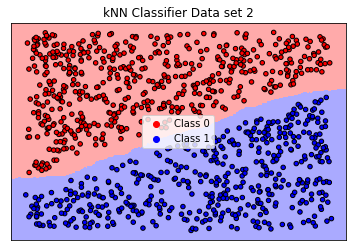

In [15]:
# TODO: * Train both kNN and logistic regression on the training set for both datasets.
#       * Evaluate the models using cross-validation.
#       * Plot the data and the decision boundary of both classifiers for one fold. -> train on whole dataset
#HINT:  plot_2d_decisionboundary() in utils.py can be used.
from sklearn.linear_model import LogisticRegressionCV

#Data set 1 #################################################################################
print('Data Set 1')
knn_with_cv(24,5,X_1,y_1,True)#cv 
knn_1 = KNeighborsClassifier(n_neighbors=24).fit(X_1,y_1)#one fold

logReg_1_cv =  LogisticRegressionCV(cv = 10, random_state = 42).fit(X_1, y_1)#cv
print('Logistic Regression and a 10 - fold cross validation: ', logReg_1_cv.score(X_1,y_1))

logReg_1 =  LogisticRegression().fit(X_1,y_1)#one fold

plot_2d_decisionboundary(logReg_1, X_1, y_1, title='logistic Regression Data set 1')
plot_2d_decisionboundary(knn_1, X_1, y_1,  title='kNN Classifier Data set 1')

#Data set 2 #################################################################################
print('Data Set 2')
knn_with_cv(28,5,X_2,y_2,True) #sqrt(1000*0.8)=sqrt(800)=28.28
knn_2 = KNeighborsClassifier(n_neighbors=28).fit(X_2,y_2)#one fold
logReg_2 =  LogisticRegressionCV(cv = 10, random_state = 42).fit(X_2, y_2)#cv
print('Logistic Regression and a 10 - fold cross validation: ', logReg_2.score(X_2,y_2))

#clf is the model from above, thats trained on the whole data set
plot_2d_decisionboundary(clf,X_2,y_2,  title='logistic Regression Data set 2')
plot_2d_decisionboundary(knn_2,X_2,y_2, title='kNN Classifier Data set 2')


**TODO:** Describe your results and analyze them: Is one model performing better than the other? Is there a difference in the datasets causing this behavior?

Dataset 1:

The kNN Classifier performs a lot better then the logistic regression. This is because the two classes overlap in the middle and its difficult to find a linear decision boundary that seperates these classes in a good and correct manner. For this data the kNN classifiers is suited better then the logistic regression.

Dataset2:

For this data set, both the kNN Classifier and logistic Regression perform with a 100% accuracy. This is because the classes are clearly sepereated and its easy to find a decision boundary for either model.

As a general rule we can say, that the kNN clasifier is more suited for data sets where we can't generate a straight decision boundary, where the data points of different classes are interwoven. The logistic regression is more suited for data sets where points of different classes are clearly seperated and where we can compute a linear decision boundary. But both models perform very well. It depends on the data which one you should use.


# Yet another Dataset

In [118]:
# TODO: * Load dataset_3.npz (data is stored again in X and in y)
#       * Train and report the accuracy for the kNN and the logistic regression classifier.

data_set_3 = np.load('dataset_3.npz')
X_3 = data_set_3['X']
y_3 = data_set_3['y']


In [64]:
#1. use cross validation to see how could the models perform 
knn_with_cv(28,5,X_3,y_3,True) # k=sqrt(1000*0.8)=sqrt(800)=28
logReg_with_cv(5,X_3,y_3,True)

knn_3 = KNeighborsClassifier(n_neighbors=28).fit(X_3,y_3)
logReg_3 = logReg(X_3,y_3,False)

KNN Model with k = 28 and a 5 - fold cross validation:
[0.955 0.985 0.99  0.97  0.89 ]
cv_scores mean:0.9579999999999999 

Logistic Regression and a 5 - fold cross validation:
[0.33  0.9   0.905 0.915 0.325]
cv_scores mean:0.675 



**TODO:** Describe why the accuracy is not always suitable for evaluating a model's classification performace. Briefly define the alternative metrics from the lecture, and explain in which cases they are more suitable.

Accuracy is not always a suitable way to evaluate a models performance especially if there is an imbalanced amount of data points for each class.. If we take the example from the lecture
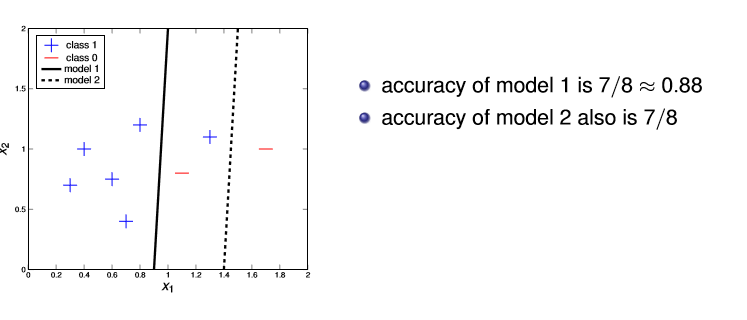
we can clearly see that these two very different models have the same accuracy. So from the numbers we wouldn't know which to choose, but while looking at the graph we would most likely choose the first model, because it seems way more important to classify all data points from class 0 correctly. If one of those two points is wrongly classified, we could say that 50% of class 0 data is not corrently classified.  

In the lecture we used two different metrics derived from the confusion matrix:
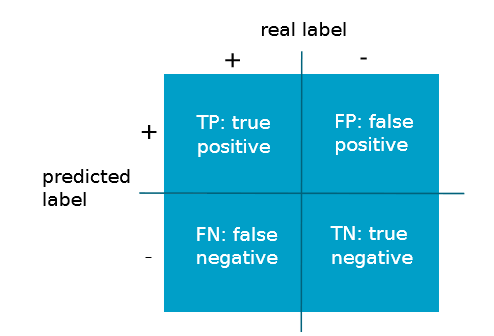

The Recall/Precision Metric is suitable for imbalanced classes and can be used for cases with more than one class where we look at e.g. class 1 against all other classes. Its asymmetric, so the results differ depending from which class we look at the metric. We look ate the following values:
- precision: $\frac{TP}{TP+FP} = \frac{True Positives}{Predicted Results (according to our model)} $
- recall: $\frac{TP}{TP+FN} = \frac{True Positives}{Actual Results (according to our data)} $
- accuray: $\frac{TP+FP}{Total} $
- F1-score ( harmonic mean): $\frac{2TP}{2TP+FP+FN}$

In other words the precision gives us the percentage of how many of our retrieved results are relevant whereas recall refers to the percentage of how many of our total relevant results were correctly classified by the model, where a data point is relevant if its in the currently considered class.
One big tradeoff is, that we cannot maximize both recall and precision, the F-1 score is a good alternative.

Another metric derived from the confusion matrix is the TPR/FPR metric. Oposite to Recall/Precision metric the TPR/FPR metric is symmetric in its classes.
We look at the following values: 
- true positive rate (TPR) /sensitivity is the recall : $\frac{TP}{TP+FN}$
- true negative rate (TNR)/ specifitiy: $\frac{TN}{TN+FN}$
- false positive rate(FPR) or 1-TNR: $\frac{FP}{TN + FP}$

For better performance TPR and TNR should be high.
A graph of the pairs (FPR,TPR), called the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve, can be used.
The AUC - ROC curve is a performance measurement for the classification problems at various threshold, so for different models. The ROC is a probability curve and the AUC tells us how much the model is capable of distinguishing between classes. The higher the AUC the better is the model at predicting the classes correctly.
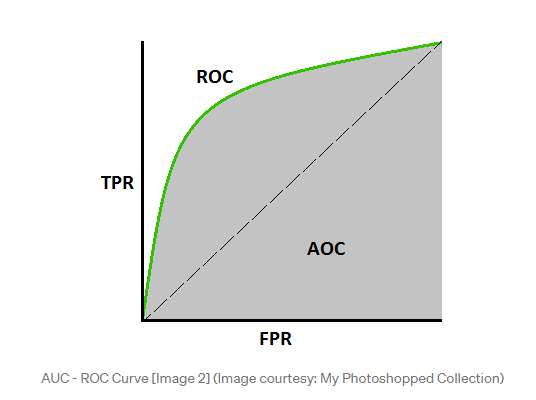
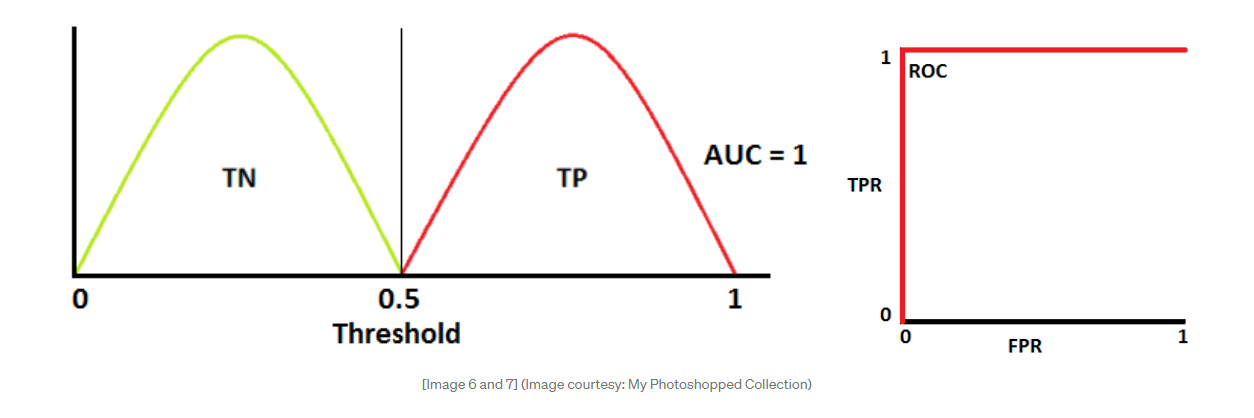
If we look at this picture we cann se the relationship between TN, TP,AUC and ROC. The redline (TP) stands for class 1 that were predicted correctly and the green line for class 0 that were predicted correctly. Here the AUC=1 so the model predicts all the data points correctly. The more the green and red line overlap, the worse our model becomes, because then FP and FN will start to exists, our AUC will become smaller and the ROC Line will start to rounden and drop to the bottom at the worst case scenario which can be seen in this picture:
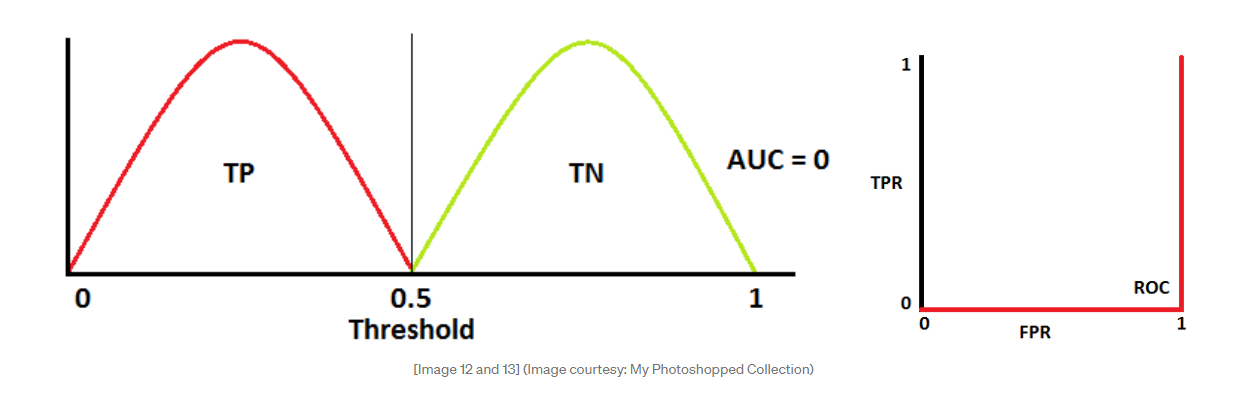

size: [2000, 1000]
dimensionen: [2, 1]
shape: [(1000, 2), (1000,)]
type: [dtype('float64'), dtype('int64')]

Maximum of Feature 1:   20.05382526651684
Minimum of Feature 1:   -18.855849116657105
Average of Feature 1:   5.450289444805515
Deviation of Feature 1: 7.418871595289164

Maximum of Feature 2:   20.92204130543951
Minimum of Feature 2:   -13.646549397587561
Average of Feature 2:   5.686564027165459
Deviation of Feature 2: 7.4325345791144235

Set of labels: [0 1]
Number of elements with label 0: 150
Number of elements with label 1: 850


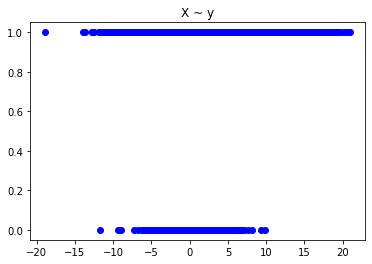

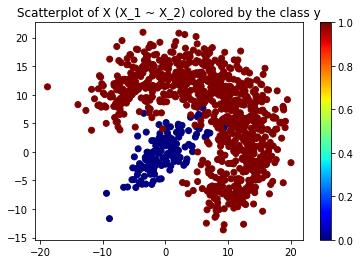

In [119]:
# TODO: analyze the dataset; focus on possible reasons for why you might want to apply the metrics described above
#       Your might consider plotting the data.
explore_data(data_set_3,X_3,y_3)

If we look at the third data set, we can see why the accuracy would be a bad choice for our data. We have 850 data points of class 1 and 150 of class 0 so we have an imbalanced set for our classes for which the accuracy doesn't give good results.


confusion matrix of the knn
[[138  12]
 [  5 845]]
precision score: 0.9859976662777129
recall score: 0.9941176470588236
f1 score: 0.9900410076157001
[0.   0.08 1.  ] [0.         0.99411765 1.        ] 0.9570588235294119 [2 1 0]


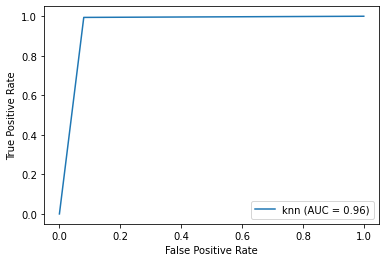

confusion matrix of the logreg
[[ 67  83]
 [ 32 818]]
precision score: 0.9078801331853497
recall score: 0.9623529411764706
f1 score: 0.934323243860651
[0.         0.55333333 1.        ] [0.         0.96235294 1.        ] 0.7045098039215687 [2 1 0]


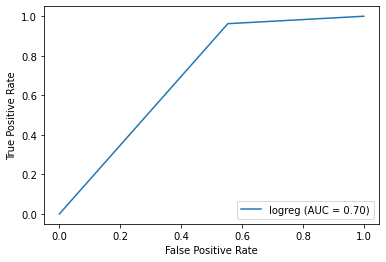

In [122]:
# TODO: * Reevalute your trained models with the metrics you described above.
#       * Visualize the confusion matrices for all classifiers
# HINT: Take a look at sklearn.metrics. Many metrics are already implemented there and can be used!
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
#function to compute metrics
def get_metrics(X,y,model,str_model):
    
    
    #1.comput y_hat -> predicted values for the model
    y_hat = model.predict(X)
    confusion_m = confusion_matrix(y,y_hat)
    #confusion matrix
    print('confusion matrix of the {}'.format(str_model))
    print(confusion_m)

    #metric precision/recall
    print('precision score: {}'.format(precision_score(y,y_hat)))
    print('recall score: {}'.format(recall_score(y,y_hat)))
    print('f1 score: {}'.format(f1_score(y,y_hat)))

    #metric TPR/FPR
    y_scores = model.predict_proba(X_3)
    y_score = y_scores[::,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_3,y_hat) 
    roc_auc = metrics.auc(fpr, tpr) 
    print(fpr,tpr,roc_auc,thresholds)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=str_model)
    display.plot()
    plt.show()

#knn model
get_metrics(X_3,y_3,knn_3,'knn')
#logistic regression
get_metrics(X_3,y_3,logReg_3,'logreg')

**TODO:** Analyze your results, focusing on the metrics used and the models used. Maybe you can also relate your results to the plot of the dataset.

If we look at the kNN classifier, we get really good values for the precision,recall,F1score and for the AUC Value.
For the logistic regression, we do have okay values for the precision score and so on, but our AUC Score is rather low with 0.7 and the ROC Curve also doesn't look that good.

If we take a look at our data set again, we can see why. The data points of class 1 "hug" the datapoints of class 0. Therefore it's really difficult for the logistic regression to find a clear decision boundary. It's much easier and better to find a decision boundary with the knn - classifier because it adjust better to the form of the data. You can also see this below, where we plotted the Models for our data set. 

C:\Users\nely9\OneDrive\Universität\WS2122\Introduction Machine Learning\Project\Project_1\Project 1-20211103\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


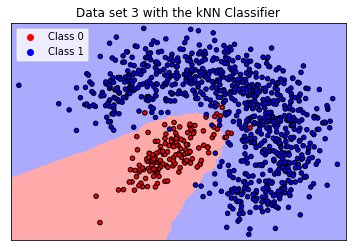

C:\Users\nely9\OneDrive\Universität\WS2122\Introduction Machine Learning\Project\Project_1\Project 1-20211103\utils.py:82: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


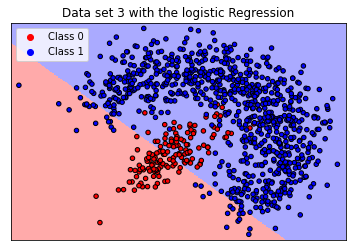

In [69]:
plot_2d_decisionboundary(knn_3,X_3,y_3, title='Data set 3 with the kNN Classifier')
plot_2d_decisionboundary(logReg_3,X_3,y_3, title='Data set 3 with the logistic Regression')


# Part 2 (30 points)
Chose **one** of the following options. Please note that in this part of the assignment you need to come up with a structure for explanations, code and analysis yourself!


### HINTS:
* the following functions may be useful (for finding nearest neighbors):
  * numpy.argsort
  * numpy.linalg.norm


### a) SMOTE _more interesting, maybe slightly harder task_
Read the paper _SMOTE: Synthetic Minority Over-sampling Technique_, which can be found here: https://arxiv.org/abs/1106.1813 and

* describe the method proposed in the paper
* implement the method (own coding required)
* apply SMOTE on datset 3 and evaluate the models on this dataset
* visualize the synthethic samples on a subset of the data
* analyze your results

*Hint:*
* you do not need to read the entire paper in detail. It is sufficient to understand the proposed SMOTE algorithm and why we are going for it.
* when considering the code in the paper, clarify the meaning of the variable N for yourself. Consider the cases where N is smaller than 100 and bigger than 100.

    
OR
### b) Adapting kNN from classificaiton to regression _might be slightly easier_
In the beginning of the lecture, we learnt that classification is only one technique in supervised learning. Another one is regression. Come up with a method to adapt the kNN classifier for regression:

* describe your strategy to adapt the kNN classifier from classification to regression
* implement your proposed method (own coding required, without using kNN regressor in sklearn!)
* show your models performance on dataset_4.npz and analyze your results.

The kNN classifier uses the concept of "feature similarity". New data points are assigned values based on how closely they resemble points in the training set. In classification the new data points get assigned a class, so a discrete value that occures most in the neighbourhood. If we look at regression we normally deal with continuous values. With the kNN regressor new data points get assigned the mean value of the k nearest neighbours.

Therefore our strategy will be the following:
1. calculate the distance between the new data points and the data point in the training set
2. select the k closest ones
3. calculate the average of the y values of the k closest neighbours for the new data points


size: [100, 100]
dimensionen: [1, 1]
shape: [(100,), (100,)]
type: [dtype('float64'), dtype('float64')]

Maximum of Feature 1:   6.275746968120228
Minimum of Feature 1:   0.03112741208135574
Average of Feature 1:   3.1329024795886933
Deviation of Feature 1: 1.7994968079525846

Maximum of Feature 2:   1.4957003058733305
Minimum of Feature 2:   -1.2084259859052902
Average of Feature 2:   -0.0026633066822928275
Deviation of Feature 2: 0.6918610395448351



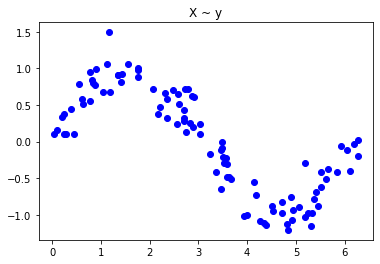

In [4]:
# load dataset_4.npz
# the data and labels are saved in X and y, respectively
data_set_4 = np.load('dataset_4.npz')
X_4 = data_set_4['X']
y_4 = data_set_4['y']

print('size:',[X_4.size,y_4.size])
print('dimensionen:',[X_4.ndim,y_4.ndim])
print('shape:',[X_4.shape,y_4.shape])
print('type:',[X_4.dtype,y_4.dtype])
print()
print("Maximum of Feature 1:   " + str(np.amax(X_4)))
print("Minimum of Feature 1:   " + str(np.amin(X_4)))
print("Average of Feature 1:   " + str(np.average(X_4)))
print("Deviation of Feature 1: " + str(np.std(X_4)))
print()
print("Maximum of Feature 2:   " + str(np.amax(y_4)))
print("Minimum of Feature 2:   " + str(np.amin(y_4)))
print("Average of Feature 2:   " + str(np.average(y_4)))
print("Deviation of Feature 2: " + str(np.std(y_4)))
print() 
    
#plot the data set
plt.plot(X_4,y_4,'bo')
plt.title('X ~ y')
plt.show()

Now that we know how our data looks like, we will only write a method for the kNN regression that works for our data. We do know, that we would need to catch a lot of errors in the beginning. We put some in, that we felt were relevant but also ignored many others.

1. calculate the distance between the new data points and the data point in the training set: As the tasks states that we should adapt the kNN classifier, we choose to use the function NearestNeighbors(n_neighbors=k) from sklearn.neighbours that uses the same distance metrics as the kNN Classifier. This needs at least a 2-dimensional array. Therefore we check, if X is a 2 - dimensional array. If it's not, we add a dimension with the value 0. This won't change the distance.

2. kneigh = neigh.kneighbors(x0,return_distance=False)
3. We get the y values of the k closest points and calculate the mean and either return a value or a list of values.

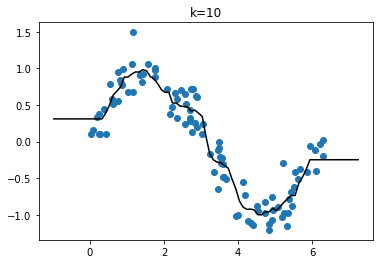

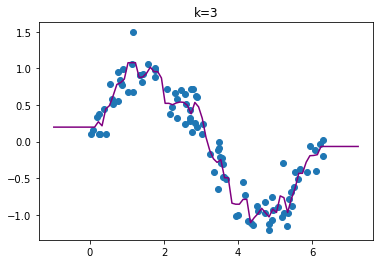

In [94]:
from sklearn.neighbors import NearestNeighbors #need 2-dimensional data, doesn't work for 1 - dimensional

#knn regressor
#X,y:Data
def knn_regressor(X,y,k,x0):
    #empty or one dimensional X -> will ignore Cases for n-dimensional X arrays with n>=3
    assert isinstance(X,np.ndarray), 'X has to be a numpy.ndarray'
    assert X.size>0, 'X cannot be empty'
    if(X.ndim == 1):
        #create 2 dimensional array from x and a vector of 0
        X = np.vstack((X,[0]*X.size)).T
    
    assert isinstance(x0,list) or isinstance(x0,np.ndarray) , 'x0 has to be a list'
    assert len(x0)>0, 'x0 cannot be empty'
    if(len(x0) == 1):
        #create 2 dimensional array from x and a vector of 0
        x0 = np.vstack((x0,[0]*(len(x0)))).T
        
    #fit model/find k closest points
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    
    #returns indices of k clostes points to x0
    kneigh = neigh.kneighbors(x0,return_distance=False)
    
    #get the y values of the k nearest points
    y_kneigh = y[kneigh]
    
    #calcualate the mean of the y_kneigh values
    mean_y_list = list()
    sum_y=0
    for j in range(0,len(x0)):
        for i in range(0,k):
            sum_y += y_kneigh[j][i]
        mean_y = sum_y/k
        mean_y_list.append(mean_y)
        sum_y=0
        
    return mean_y_list

#create a mesh to plot in
x_min, x_max = X_4.min() - 1, X_4.max() + 1
xx= np.arange(x_min, x_max, 0.1)
yy= [0]*len(xx)
xx_yy = np.vstack((xx,yy)).T


# Plot the decision boundary
Z_knn_reg_3 = knn_regressor(X_4,y_4,10,xx_yy)#k=sqrt(100)=10    
fig,axs = plt.subplots()

axs.scatter(X_4,y_4)
axs.set_title('k=10')
axs.plot(xx,Z_knn_reg_3,'black')
plt.show()  

fig,axs = plt.subplots()
axs.scatter(X_4,y_4)
axs.set_title('k=3')
axs.plot(xx,knn_regressor(X_4,y_4,3,xx_yy),'purple')
plt.show()  


In [82]:
#calculate the R²
from sklearn.metrics import r2_score

y_pred = knn_regressor(X_4,y_4,10,np.vstack((X_4,[0]*len(X_4))).T)
print(r2_score(y_4, y_pred))

0.9231602061551336


Analyze Result:
In the graph and with the R² we can see, that our kNN regressor models our data very well. With the regression you can also see, that the functions gets smoother for large k and that the models overfits the data for small k. If you find a good performing k value, the kNN regression is another good Model for regressions.